<a href="https://colab.research.google.com/github/phattp1229/MachineLearning/blob/main/MachineLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1/Clean Data and Exploratory Data Analysis**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder,StandardScaler,MinMaxScaler,RobustScaler
import scipy.stats as stats
import pylab
from statsmodels.regression.linear_model import OLS

In [ ]:
data = pd.read_csv('Metro_Interstate_Traffic_Volume.csv', keep_default_na=False)
data.head()

holiday    temp  rain_1h  snow_1h  clouds_all weather_main  \
0    None  288.28      0.0      0.0          40       Clouds   
1    None  289.36      0.0      0.0          75       Clouds   
2    None  289.58      0.0      0.0          90       Clouds   
3    None  290.13      0.0      0.0          90       Clouds   
4    None  291.14      0.0      0.0          75       Clouds   

  weather_description            date_time  traffic_volume  
0    scattered clouds  2012-10-02 09:00:00            5545  
1       broken clouds  2012-10-02 10:00:00            4516  
2     overcast clouds  2012-10-02 11:00:00            4767  
3     overcast clouds  2012-10-02 12:00:00            5026  
4       broken clouds  2012-10-02 13:00:00            4918

In [ ]:
data.tail()

holiday    temp  rain_1h  snow_1h  clouds_all  weather_main  \
48199    None  283.45      0.0      0.0          75        Clouds   
48200    None  282.76      0.0      0.0          90        Clouds   
48201    None  282.73      0.0      0.0          90  Thunderstorm   
48202    None  282.09      0.0      0.0          90        Clouds   
48203    None  282.12      0.0      0.0          90        Clouds   

          weather_description            date_time  traffic_volume  
48199           broken clouds  2018-09-30 19:00:00            3543  
48200         overcast clouds  2018-09-30 20:00:00            2781  
48201  proximity thunderstorm  2018-09-30 21:00:00            2159  
48202         overcast clouds  2018-09-30 22:00:00            1450  
48203         overcast clouds  2018-09-30 23:00:00             954

In [ ]:
data.shape

(48204, 9)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


There are 5 Numerical columns in the dataset out of that 3 columns have decimal values.
There are 4 Categorical columns in the dataset

In [ ]:
print(data.isnull().sum())


holiday                0
temp                   0
rain_1h                0
snow_1h                0
clouds_all             0
weather_main           0
weather_description    0
date_time              0
traffic_volume         0
dtype: int64


In [ ]:
# Perform statistical analysis
data.describe()

temp       rain_1h       snow_1h    clouds_all  traffic_volume
count  48204.000000  48204.000000  48204.000000  48204.000000    48204.000000
mean     281.205870      0.334264      0.000222     49.362231     3259.818355
std       13.338232     44.789133      0.008168     39.015750     1986.860670
min        0.000000      0.000000      0.000000      0.000000        0.000000
25%      272.160000      0.000000      0.000000      1.000000     1193.000000
50%      282.450000      0.000000      0.000000     64.000000     3380.000000
75%      291.806000      0.000000      0.000000     90.000000     4933.000000
max      310.070000   9831.300000      0.510000    100.000000     7280.000000

Gi√° tr·ªã trung b√¨nh (mean) v√† trung v·ªã (median) c·ªßa t·∫•t c·∫£ c√°c c·ªôt gi√∫p ch√∫ng ta nh·∫≠n bi·∫øt ƒë·ªô l·ªách (skewness) c·ªßa d·ªØ li·ªáu.

Nh∆∞ ch√∫ng ta ƒë√£ bi·∫øt, khi:
Mean > Median ‚Üí d·ªØ li·ªáu b·ªã l·ªách ph·∫£i (right skewed), cho th·∫•y ph·∫ßn l·ªõn gi√° tr·ªã n·∫±m ·ªü b√™n ph·∫£i v√† c√≥ th·ªÉ c√≥ c√°c ngo·∫°i l·ªá (outliers) n·∫±m b√™n tr√°i c·ªßa ƒë∆∞·ªùng ph√¢n ph·ªëi chu·∫©n.

Mean < Median ‚Üí ng∆∞·ª£c l·∫°i, d·ªØ li·ªáu b·ªã l·ªách tr√°i (left skewed).

Trong tr∆∞·ªùng h·ª£p n√†y, kh√¥ng c√≥ s·ª± ch√™nh l·ªách l·ªõn gi·ªØa gi√° tr·ªã trung b√¨nh v√† trung v·ªã, do ƒë√≥ c·∫ßn ph√¢n t√≠ch th√™m v·ªÅ c√°c ngo·∫°i l·ªá (outliers) ƒë·ªÉ hi·ªÉu r√µ h∆°n.

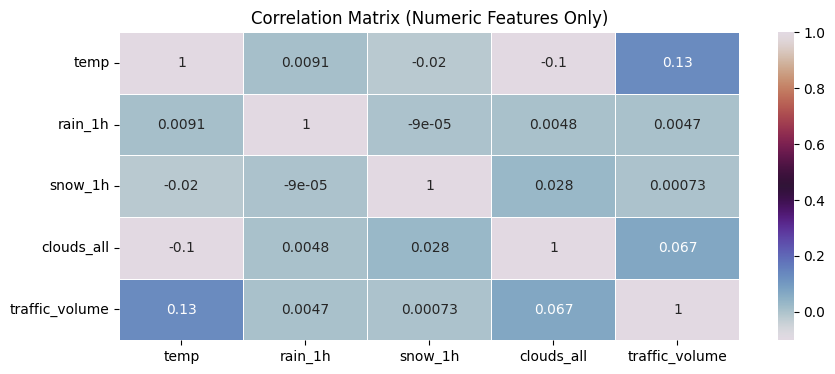

In [ ]:
#Correlation Plot (Bi·ªÉu ƒë·ªì t∆∞∆°ng quan)
numeric_cols = data.select_dtypes(include=['number'])  # ch·ªâ l·∫•y c√°c c·ªôt ki·ªÉu s·ªë
corr = numeric_cols.corr()

plt.figure(figsize=(10, 4))
sns.heatmap(corr, annot=True, linewidths=0.5, cmap='twilight')
plt.title("Correlation Matrix (Numeric Features Only)")
plt.show()


T·ª´ bi·ªÉu ƒë·ªì t∆∞∆°ng quan, c√≥ th·ªÉ th·∫•y r·∫±ng t·∫•t c·∫£ c√°c c·ªôt ƒë·ªÅu c√≥ m·ªëi t∆∞∆°ng quan d∆∞∆°ng v·ªõi bi·∫øn ƒë·∫ßu ra traffic_volume. Tuy nhi√™n, m·ª©c ƒë·ªô t∆∞∆°ng quan n√†y kh√¥ng m·∫°nh.

M·ªëi t∆∞∆°ng quan v·ªõi l∆∞u l∆∞·ª£ng giao th√¥ng (traffic_volume): Bi·∫øn temp (nhi·ªát ƒë·ªô) d∆∞·ªùng nh∆∞ c√≥ m·ªëi t∆∞∆°ng quan d∆∞∆°ng y·∫øu v·ªõi traffic_volume. C√°c bi·∫øn s·ªë kh√°c nh∆∞ rain_1h v√† snow_1h c√≥ m·ªëi t∆∞∆°ng quan r·∫•t y·∫øu.

M·ªëi t∆∞∆°ng quan gi·ªØa c√°c bi·∫øn d·ª± b√°o: C√≥ m·ªôt s·ªë c·∫∑p bi·∫øn d·ª± b√°o c√≥ m·ªëi t∆∞∆°ng quan t∆∞∆°ng ƒë·ªëi, nh∆∞ng kh√¥ng c√≥ m·ªëi t∆∞∆°ng quan n√†o qu√° m·∫°nh (> 0.8 ho·∫∑c < -0.8) gi·ªØa c√°c bi·∫øn s·ªë d·∫°ng s·ªë (ch·ªâ d·ª±a tr√™n bi·ªÉu ƒë·ªì hi·ªán t·∫°i ch·ªâ hi·ªÉn th·ªã c√°c c·ªôt s·ªë ban ƒë·∫ßu).

Nh√¨n chung, kh√¥ng c√≥ m·ªëi t∆∞∆°ng quan tuy·∫øn t√≠nh c·ª±c k·ª≥ m·∫°nh gi·ªØa c√°c bi·∫øn s·ªë d·∫°ng s·ªë ban ƒë·∫ßu v√† traffic_volume.



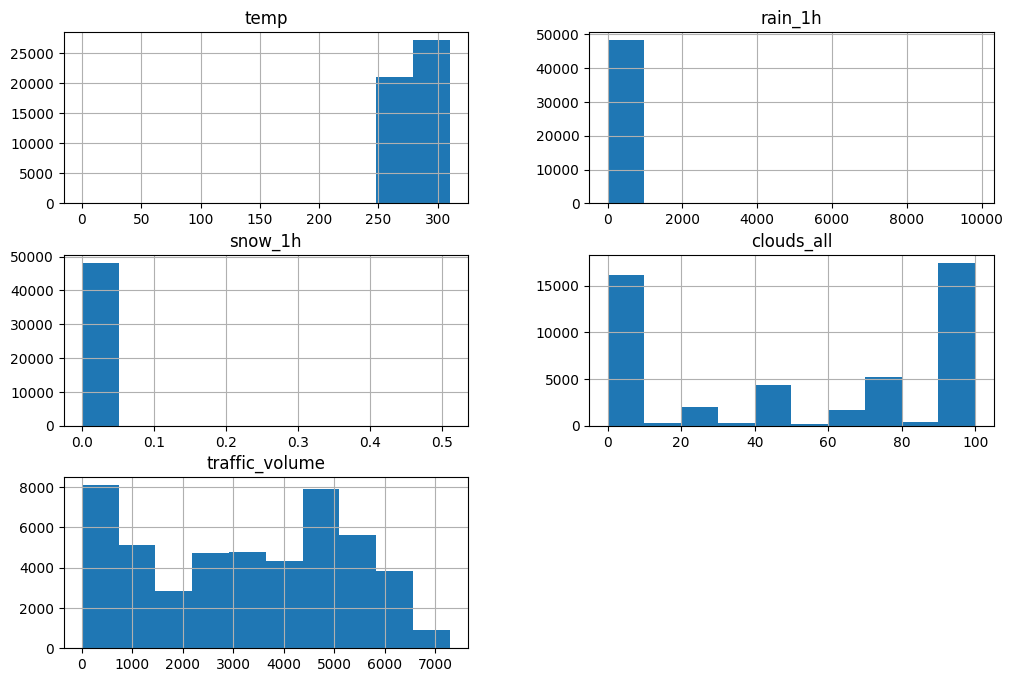

In [ ]:
#Visualizing the Numerical Categories (bi·ªÉu ƒë·ªì histogram (t·∫ßn su·∫•t ph√¢n ph·ªëi) )
data.hist(figsize=(12,8))
plt.show()

Ch√∫ng ta c√≥ th·ªÉ th·∫•y t·∫•t c·∫£ c√°c danh m·ª•c s·ªë v√† ph·∫°m vi gi√° tr·ªã c·ªßa ch√∫ng trong bi·ªÉu ƒë·ªì histogram.

  Trong c·ªôt clouds_all, nhi·ªÅu gi√° tr·ªã h∆°n n·∫±m trong ph·∫°m vi 90-100 v√† 0-10.

  Trong rain_1h v√† snow_1h c√≥ gi√° tr·ªã th·∫≠p ph√¢n th·∫•p v√† n·∫±m trong ph·∫°m vi 0-5 v√† 0,0-0,05 t∆∞∆°ng ·ª©ng.

  Trong c√°c c·ªôt temp, gi√° tr·ªã t·ªëi thi·ªÉu l√† kho·∫£ng 220 v√† gi√° tr·ªã t·ªëi ƒëa l√† 310 v√† c√≥ ph√¢n ph·ªëi t·ªët trong ph·∫°m vi 250-310.

  Trong c·ªôt traffic_volume, d·ªØ li·ªáu ƒë∆∞·ª£c ph√¢n ph·ªëi t·ªët trong to√†n b·ªô ph·∫°m vi.

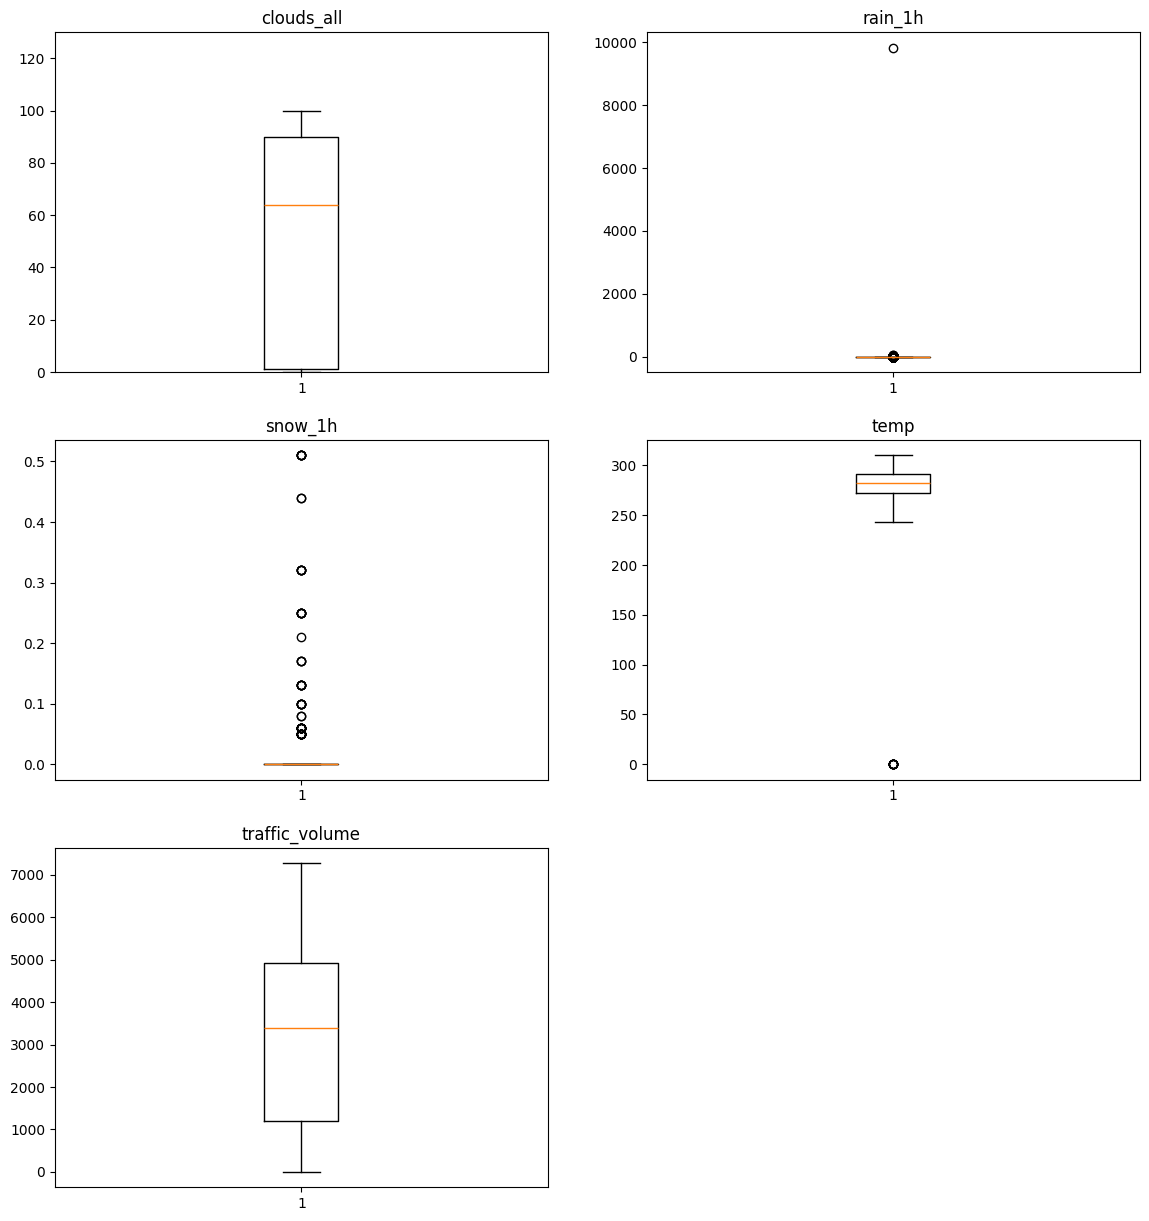

In [ ]:
#box plot for all the numeric values
plt.figure(figsize=(14,15))
plt.subplot(3,2,1)
plt.boxplot(data['clouds_all'])
plt.ylim(0,130)
plt.title('clouds_all')

plt.subplot(3,2,2)
plt.boxplot(data['rain_1h'])
plt.title('rain_1h')

plt.subplot(3,2,3)
plt.boxplot(data['snow_1h'])
plt.title('snow_1h')

plt.subplot(3,2,4)
plt.boxplot(data['temp'])
plt.title('temp')

plt.subplot(3,2,5)
plt.boxplot(data['traffic_volume'])
plt.title('traffic_volume')

plt.show()

clouds_all: Ph√¢n ph·ªëi c√≥ v·∫ª l·ªách, c√≥ th·ªÉ c√≥ m·ªôt s·ªë ngo·∫°i l·ªá ·ªü ph√≠a tr√™n.

rain_1h: H·∫ßu h·∫øt c√°c gi√° tr·ªã r·∫•t g·∫ßn 0, c√≥ nhi·ªÅu ngo·∫°i l·ªá l√† c√°c gi√° tr·ªã m∆∞a l·ªõn.

snow_1h: T∆∞∆°ng t·ª± rain_1h, h·∫ßu h·∫øt c√°c gi√° tr·ªã r·∫•t g·∫ßn 0, c√≥ ngo·∫°i l·ªá l√† c√°c gi√° tr·ªã tuy·∫øt l·ªõn.

temp: Ph√¢n ph·ªëi c√≥ v·∫ª t∆∞∆°ng ƒë·ªëi ƒë·ªëi x·ª©ng v√† √≠t ngo·∫°i l·ªá h∆°n so v·ªõi rain_1h v√† snow_1h.

traffic_volume: Ph√¢n ph·ªëi kh√° tr·∫£i ƒë·ªÅu, c√≥ th·ªÉ c√≥ m·ªôt s·ªë ngo·∫°i l·ªá ·ªü c·∫£ hai ƒë·∫ßu, nh∆∞ng √≠t ƒëi·ªÉm ngo·∫°i l·ªá r√µ r·ªát nh∆∞ m∆∞a ho·∫∑c tuy·∫øt.

**Outliers Detect**

In [ ]:
# rain_1h column
data[(data['rain_1h'] == data['rain_1h'].max())]

holiday    temp  rain_1h  snow_1h  clouds_all weather_main  \
24872    None  302.11   9831.3      0.0          75         Rain   

      weather_description            date_time  traffic_volume  
24872     very heavy rain  2016-07-11 17:00:00            5535

B·∫±ng c√°ch tr√≠ch xu·∫•t to√†n b·ªô h√†ng d·ªØ li·ªáu, ch√∫ng ta c√≥ th·ªÉ nh·∫≠n th·∫•y r·∫±ng d·ªØ li·ªáu l√† h·ª£p l·ªá v√¨ n√≥ thu·ªôc tr∆∞·ªùng h·ª£p "m∆∞a r·∫•t to" (very heavy rain). Tuy nhi√™n, ch√∫ng ta c·∫ßn so s√°nh v·ªõi c√°c b·∫£n ghi kh√°c c≈©ng c√≥ ƒëi·ªÅu ki·ªán th·ªùi ti·∫øt l√† "very heavy rain" ƒë·ªÉ x√°c minh th√™m.



In [ ]:
data[(data['weather_description']=='very heavy rain')]

holiday    temp  rain_1h  snow_1h  clouds_all weather_main  \
7133     None  291.76    16.38      0.0          76         Rain   
7179     None  295.82    44.45      0.0          76         Rain   
7664     None  292.82    19.90      0.0          20         Rain   
7667     None  292.65    25.32      0.0           8         Rain   
7670     None  292.87    21.42      0.0          90         Rain   
8247     None  289.10    55.63      0.0          68         Rain   
10734    None  262.65    18.80      0.0          64         Rain   
10806    None  264.50    28.70      0.0          64         Rain   
14853    None  298.21    18.03      0.0           0         Rain   
16300    None  294.87    23.80      0.0          90         Rain   
16504    None  292.02    27.57      0.0          90         Rain   
16923    None  295.12    20.24      0.0          90         Rain   
17437    None  294.49    25.46      0.0          90         Rain   
24872    None  302.11  9831.30      0.0          75         Rain   
25481    None  294.92    16.51      0.0          32         Rain   
25639    None  292.70    18.42      0.0          80         Rain   
25779    None  297.71    31.75      0.0           0         Rain   
25961    None  294.07    20.07      0.0          40         Rain   

      weather_description            date_time  traffic_volume  
7133      very heavy rain  2013-06-22 05:00:00             635  
7179      very heavy rain  2013-06-24 11:00:00            4802  
7664      very heavy rain  2013-07-14 05:00:00             542  
7667      very heavy rain  2013-07-14 06:00:00             958  
7670      very heavy rain  2013-07-14 07:00:00            1745  
8247      very heavy rain  2013-08-07 02:00:00             315  
10734     very heavy rain  2013-12-16 19:00:00            2755  
10806     very heavy rain  2013-12-19 23:00:00            1190  
14853     very heavy rain  2014-06-02 16:00:00            6443  
16300     very heavy rain  2015-07-06 03:00:00             346  
16504     very heavy rain  2015-07-13 00:00:00             492  
16923     very heavy rain  2015-07-28 07:00:00            4302  
17437     very heavy rain  2015-08-16 21:00:00            2118  
24872     very heavy rain  2016-07-11 17:00:00            5535  
25481     very heavy rain  2016-08-04 07:00:00            5724  
25639     very heavy rain  2016-08-10 21:00:00            1904  
25779     very heavy rain  2016-08-16 17:00:00            4913  
25961     very heavy rain  2016-08-23 22:00:00            1520

Ta c√≥ th·ªÉ k·∫øt lu·∫≠n r·∫±ng ƒë√¢y l√† m·ªôt ƒëi·ªÉm ngo·∫°i l·ªá (outlier) ho·∫∑c l√† l·ªói nh·∫≠p li·ªáu khi so s√°nh v·ªõi c√°c d·ªØ li·ªáu li√™n quan kh√°c. C·ª• th·ªÉ, c√°c b·∫£n ghi c√≥ gi√° tr·ªã clouds_all cao h∆°n l·∫°i c√≥ l∆∞·ª£ng m∆∞a (rain_1h) th·∫•p h∆°n so v·ªõi b·∫£n ghi n√†y. Do ƒë√≥, ƒëi·ªÉm d·ªØ li·ªáu n√†y c·∫ßn ƒë∆∞·ª£c x·ª≠ l√Ω ho·∫∑c lo·∫°i b·ªè.

In [ ]:
# temp column
data[(data['temp'] == data['temp'].min())]

holiday  temp  rain_1h  snow_1h  clouds_all weather_main  \
11898    None   0.0      0.0      0.0           0        Clear   
11899    None   0.0      0.0      0.0           0        Clear   
11900    None   0.0      0.0      0.0           0        Clear   
11901    None   0.0      0.0      0.0           0        Clear   
11946    None   0.0      0.0      0.0           0        Clear   
11947    None   0.0      0.0      0.0           0        Clear   
11948    None   0.0      0.0      0.0           0        Clear   
11949    None   0.0      0.0      0.0           0        Clear   
11950    None   0.0      0.0      0.0           0        Clear   
11951    None   0.0      0.0      0.0           0        Clear   

      weather_description            date_time  traffic_volume  
11898        sky is clear  2014-01-31 03:00:00             361  
11899        sky is clear  2014-01-31 04:00:00             734  
11900        sky is clear  2014-01-31 05:00:00            2557  
11901        sky is clear  2014-01-31 06:00:00            5150  
11946        sky is clear  2014-02-02 03:00:00             291  
11947        sky is clear  2014-02-02 04:00:00             284  
11948        sky is clear  2014-02-02 05:00:00             434  
11949        sky is clear  2014-02-02 06:00:00             739  
11950        sky is clear  2014-02-02 07:00:00             962  
11951        sky is clear  2014-02-02 08:00:00            1670

Trong c·ªôt nhi·ªát ƒë·ªô (temperature), c√°c gi√° tr·ªã b·∫±ng 0 xu·∫•t hi·ªán ·ªü m·ªôt s·ªë th·ªùi ƒëi·ªÉm nh·∫•t ƒë·ªãnh v√† c√°c m·ªëc th·ªùi gian ƒë√≥ c≈©ng li√™n ti·∫øp nhau. ƒêi·ªÅu n√†y cho th·∫•y c√≥ th·ªÉ nhi·ªát ƒë·ªô t·∫°i nh·ªØng th·ªùi ƒëi·ªÉm ƒë√≥ kh√¥ng ƒë∆∞·ª£c ghi nh·∫≠n v√† ƒë√£ ƒë∆∞·ª£c ƒëi·ªÅn m·∫∑c ƒë·ªãnh l√† 0. V√¨ v·∫≠y, ch√∫ng ta c·∫ßn thay th·∫ø c√°c gi√° tr·ªã n√†y b·∫±ng nh·ªØng gi√° tr·ªã t∆∞∆°ng ·ª©ng (g·∫ßn ƒë√∫ng) d·ª±a tr√™n c√°c th·ªùi ƒëi·ªÉm l√¢n c·∫≠n.



**Handling Outliers**

In [ ]:
#rain_1h column
med_val = data['rain_1h'][(data['weather_description']=='very heavy rain') & (data['traffic_volume'] > 4000)].median()
data['rain_1h'][data['rain_1h'] == data['rain_1h'].max()] = med_val

In [ ]:
import calendar
from datetime import datetime
#Extracting month and year from the date column to get more information about the data
data['Year']  = [datetime.strptime(i,'%Y-%m-%d %H:%M:%S').year for i in data['date_time']]
data['Month'] = [datetime.strptime(i,'%Y-%m-%d %H:%M:%S').month for i in data['date_time']]
data['Day']   = [datetime.strptime(i,'%Y-%m-%d %H:%M:%S').day for i in data['date_time']]
data['Hour']  = [datetime.strptime(i,'%Y-%m-%d %H:%M:%S').hour for i in data['date_time']]

In [ ]:
#Outlier handling for Temp column
data[data['temp'] == 0.0]

holiday  temp  rain_1h  snow_1h  clouds_all weather_main  \
11898    None   0.0      0.0      0.0           0        Clear   
11899    None   0.0      0.0      0.0           0        Clear   
11900    None   0.0      0.0      0.0           0        Clear   
11901    None   0.0      0.0      0.0           0        Clear   
11946    None   0.0      0.0      0.0           0        Clear   
11947    None   0.0      0.0      0.0           0        Clear   
11948    None   0.0      0.0      0.0           0        Clear   
11949    None   0.0      0.0      0.0           0        Clear   
11950    None   0.0      0.0      0.0           0        Clear   
11951    None   0.0      0.0      0.0           0        Clear   

      weather_description            date_time  traffic_volume  Year  Month  \
11898        sky is clear  2014-01-31 03:00:00             361  2014      1   
11899        sky is clear  2014-01-31 04:00:00             734  2014      1   
11900        sky is clear  2014-01-31 05:00:00            2557  2014      1   
11901        sky is clear  2014-01-31 06:00:00            5150  2014      1   
11946        sky is clear  2014-02-02 03:00:00             291  2014      2   
11947        sky is clear  2014-02-02 04:00:00             284  2014      2   
11948        sky is clear  2014-02-02 05:00:00             434  2014      2   
11949        sky is clear  2014-02-02 06:00:00             739  2014      2   
11950        sky is clear  2014-02-02 07:00:00             962  2014      2   
11951        sky is clear  2014-02-02 08:00:00            1670  2014      2   

       Day  Hour  
11898   31     3  
11899   31     4  
11900   31     5  
11901   31     6  
11946    2     3  
11947    2     4  
11948    2     5  
11949    2     6  
11950    2     7  
11951    2     8

th√°ng v√† ng√†y n√†y c√≥ c√°c gi√° tr·ªã b·∫±ng 0 trong c·ªôt temp. V√¨ v·∫≠y, c·∫ßn tr√≠ch xu·∫•t v√† ph√¢n t√≠ch chi ti·∫øt c√°c b·∫£n ghi n√†y.

In [ ]:
data[(data['Year'] == 2014) & (data['Month'] == 1 ) & (data['Day'] == 31)].head(10)

holiday    temp  rain_1h  snow_1h  clouds_all weather_main  \
11895    None  255.93      0.0      0.0           0        Clear   
11896    None  255.93      0.0      0.0           0        Clear   
11897    None  255.93      0.0      0.0           0        Clear   
11898    None    0.00      0.0      0.0           0        Clear   
11899    None    0.00      0.0      0.0           0        Clear   
11900    None    0.00      0.0      0.0           0        Clear   
11901    None    0.00      0.0      0.0           0        Clear   
11902    None  255.93      0.0      0.0           0        Clear   
11903    None  255.93      0.0      0.0           0        Clear   
11904    None  255.93      0.0      0.0           0        Clear   

      weather_description            date_time  traffic_volume  Year  Month  \
11895        sky is clear  2014-01-31 00:00:00             644  2014      1   
11896        sky is clear  2014-01-31 01:00:00             390  2014      1   
11897        sky is clear  2014-01-31 02:00:00             313  2014      1   
11898        sky is clear  2014-01-31 03:00:00             361  2014      1   
11899        sky is clear  2014-01-31 04:00:00             734  2014      1   
11900        sky is clear  2014-01-31 05:00:00            2557  2014      1   
11901        sky is clear  2014-01-31 06:00:00            5150  2014      1   
11902        sky is clear  2014-01-31 07:00:00            5363  2014      1   
11903        sky is clear  2014-01-31 08:00:00            5269  2014      1   
11904        sky is clear  2014-01-31 09:00:00            4721  2014      1   

       Day  Hour  
11895   31     0  
11896   31     1  
11897   31     2  
11898   31     3  
11899   31     4  
11900   31     5  
11901   31     6  
11902   31     7  
11903   31     8  
11904   31     9

Ta c√≥ th·ªÉ th·∫•y nhi·ªát ƒë·ªô duy tr√¨ ·ªïn ƒë·ªãnh t·ª´ khung gi·ªù 0 ƒë·∫øn 9, v√¨ v·∫≠y ta s·∫Ω thay th·∫ø c√°c gi√° tr·ªã nhi·ªát ƒë·ªô b·∫±ng 0 b·∫±ng gi√° tr·ªã 255.93.

In [ ]:
data['temp'][(data['Day'] == 31) & (data['temp'] == 0.0)] = 255.93
data[(data['Year'] == 2014) & (data['Month'] == 2 ) & (data['Day'] == 2)].head(10)

holiday    temp  rain_1h  snow_1h  clouds_all weather_main  \
11943    None  255.59      0.0      0.0           0        Clear   
11944    None  255.48      0.0      0.0           0        Clear   
11945    None  255.37      0.0      0.0           0        Clear   
11946    None    0.00      0.0      0.0           0        Clear   
11947    None    0.00      0.0      0.0           0        Clear   
11948    None    0.00      0.0      0.0           0        Clear   
11949    None    0.00      0.0      0.0           0        Clear   
11950    None    0.00      0.0      0.0           0        Clear   
11951    None    0.00      0.0      0.0           0        Clear   
11952    None  255.62      0.0      0.0           0        Clear   

      weather_description            date_time  traffic_volume  Year  Month  \
11943        sky is clear  2014-02-02 00:00:00            1143  2014      2   
11944        sky is clear  2014-02-02 01:00:00             695  2014      2   
11945        sky is clear  2014-02-02 02:00:00             539  2014      2   
11946        sky is clear  2014-02-02 03:00:00             291  2014      2   
11947        sky is clear  2014-02-02 04:00:00             284  2014      2   
11948        sky is clear  2014-02-02 05:00:00             434  2014      2   
11949        sky is clear  2014-02-02 06:00:00             739  2014      2   
11950        sky is clear  2014-02-02 07:00:00             962  2014      2   
11951        sky is clear  2014-02-02 08:00:00            1670  2014      2   
11952        sky is clear  2014-02-02 09:00:00            2506  2014      2   

       Day  Hour  
11943    2     0  
11944    2     1  
11945    2     2  
11946    2     3  
11947    2     4  
11948    2     5  
11949    2     6  
11950    2     7  
11951    2     8  
11952    2     9

Trong th√°ng 2, nhi·ªát ƒë·ªô c√≥ xu h∆∞·ªõng tƒÉng d·∫ßn, v√¨ v·∫≠y ch√∫ng ta c·∫ßn thay th·∫ø c√°c gi√° tr·ªã b·∫±ng 0 theo c√πng m·ªôt c√°ch tƒÉng d·∫ßn nh∆∞ v·∫≠y.

In [ ]:
np.round(np.linspace(255.41,255.62,6,endpoint=False),2)

array([255.41, 255.44, 255.48, 255.52, 255.55, 255.58])

In [ ]:
data['temp'][data['temp'] == 0] = [i for i in np.round(np.linspace(255.41,255.62,6,endpoint=False),2)]
data.drop('date_time',axis=1,inplace=True)
data = data[['holiday','temp','rain_1h','snow_1h','Year','Month','Day','Hour','weather_main','weather_description','traffic_volume']]
data.head()

holiday    temp  rain_1h  snow_1h  Year  Month  Day  Hour weather_main  \
0    None  288.28      0.0      0.0  2012     10    2     9       Clouds   
1    None  289.36      0.0      0.0  2012     10    2    10       Clouds   
2    None  289.58      0.0      0.0  2012     10    2    11       Clouds   
3    None  290.13      0.0      0.0  2012     10    2    12       Clouds   
4    None  291.14      0.0      0.0  2012     10    2    13       Clouds   

  weather_description  traffic_volume  
0    scattered clouds            5545  
1       broken clouds            4516  
2     overcast clouds            4767  
3     overcast clouds            5026  
4       broken clouds            4918

# **2/Pre Processing** ( Ti·ªÅn x·ª≠ l√Ω )

In [ ]:
data.head()

holiday    temp  rain_1h  snow_1h  Year  Month  Day  Hour weather_main  \
0    None  288.28      0.0      0.0  2012     10    2     9       Clouds   
1    None  289.36      0.0      0.0  2012     10    2    10       Clouds   
2    None  289.58      0.0      0.0  2012     10    2    11       Clouds   
3    None  290.13      0.0      0.0  2012     10    2    12       Clouds   
4    None  291.14      0.0      0.0  2012     10    2    13       Clouds   

  weather_description  traffic_volume  
0    scattered clouds            5545  
1       broken clouds            4516  
2     overcast clouds            4767  
3     overcast clouds            5026  
4       broken clouds            4918

In [ ]:
data.tail()

holiday    temp  rain_1h  snow_1h  Year  Month  Day  Hour  weather_main  \
48199    None  283.45      0.0      0.0  2018      9   30    19        Clouds   
48200    None  282.76      0.0      0.0  2018      9   30    20        Clouds   
48201    None  282.73      0.0      0.0  2018      9   30    21  Thunderstorm   
48202    None  282.09      0.0      0.0  2018      9   30    22        Clouds   
48203    None  282.12      0.0      0.0  2018      9   30    23        Clouds   

          weather_description  traffic_volume  
48199           broken clouds            3543  
48200         overcast clouds            2781  
48201  proximity thunderstorm            2159  
48202         overcast clouds            1450  
48203         overcast clouds             954

There are three categorical variables present in the dataset. we need to convert it into numerical before applying it to linear regression and KNN Model.

In [ ]:
#Using Label Encoder . It assigns a numerical value for each category
le =LabelEncoder()
Holiday_labels = le.fit_transform(data['holiday'])
{index: label for index , label in enumerate(le.classes_)}

{0: 'Christmas Day',
 1: 'Columbus Day',
 2: 'Independence Day',
 3: 'Labor Day',
 4: 'Martin Luther King Jr Day',
 5: 'Memorial Day',
 6: 'New Years Day',
 7: 'None',
 8: 'State Fair',
 9: 'Thanksgiving Day',
 10: 'Veterans Day',
 11: 'Washingtons Birthday'}

There are 11 Unique values in the column holiday and every value is assigned with a numerical value.

In [ ]:
#For weather_main column
weather_main = le.fit_transform(data['weather_main'])
{index: label for index , label in enumerate(le.classes_)}

{0: 'Clear',
 1: 'Clouds',
 2: 'Drizzle',
 3: 'Fog',
 4: 'Haze',
 5: 'Mist',
 6: 'Rain',
 7: 'Smoke',
 8: 'Snow',
 9: 'Squall',
 10: 'Thunderstorm'}

In [ ]:
#For weather_description column
weather_description = le.fit_transform(data['weather_description'])
{index: label for index , label in enumerate(le.classes_)}

{0: 'SQUALLS',
 1: 'Sky is Clear',
 2: 'broken clouds',
 3: 'drizzle',
 4: 'few clouds',
 5: 'fog',
 6: 'freezing rain',
 7: 'haze',
 8: 'heavy intensity drizzle',
 9: 'heavy intensity rain',
 10: 'heavy snow',
 11: 'light intensity drizzle',
 12: 'light intensity shower rain',
 13: 'light rain',
 14: 'light rain and snow',
 15: 'light shower snow',
 16: 'light snow',
 17: 'mist',
 18: 'moderate rain',
 19: 'overcast clouds',
 20: 'proximity shower rain',
 21: 'proximity thunderstorm',
 22: 'proximity thunderstorm with drizzle',
 23: 'proximity thunderstorm with rain',
 24: 'scattered clouds',
 25: 'shower drizzle',
 26: 'shower snow',
 27: 'sky is clear',
 28: 'sleet',
 29: 'smoke',
 30: 'snow',
 31: 'thunderstorm',
 32: 'thunderstorm with drizzle',
 33: 'thunderstorm with heavy rain',
 34: 'thunderstorm with light drizzle',
 35: 'thunderstorm with light rain',
 36: 'thunderstorm with rain',
 37: 'very heavy rain'}

In [ ]:
#Applying it in the primary dataset
data['holiday'] = le.fit_transform(data['holiday'])
data['weather_main'] = le.fit_transform(data['weather_main'])
data['weather_description'] = le.fit_transform(data['weather_description'])
data.head()

holiday    temp  rain_1h  snow_1h  Year  Month  Day  Hour  weather_main  \
0        7  288.28      0.0      0.0  2012     10    2     9             1   
1        7  289.36      0.0      0.0  2012     10    2    10             1   
2        7  289.58      0.0      0.0  2012     10    2    11             1   
3        7  290.13      0.0      0.0  2012     10    2    12             1   
4        7  291.14      0.0      0.0  2012     10    2    13             1   

   weather_description  traffic_volume  
0                   24            5545  
1                    2            4516  
2                   19            4767  
3                   19            5026  
4                    2            4918

In [ ]:
data.to_csv('Metro-Interstate-Traffic-Volume-Encoded.csv',header=True,index=False)

# **Data Scaling (chu·∫©n h√≥a d·ªØ li·ªáu)**

Dataset will contain columns highly varying in magnitudes, units and range. Scaling it will bring it to a Uniform Range.

There are three scaling types:

     Standard Scaler: Z-score Transformation -> Linear Regression
     MinMax Scalar  : Uses minimum and maximum value for transformation
     Robust Scalar  : Uses IQR for transformation

In [ ]:
#Standard Scalar
stdscalar = StandardScaler()
data_stdscalar = stdscalar.fit_transform(data)
data_stdscalar = pd.DataFrame(data_stdscalar,columns=data.columns)
data_stdscalar.head()

holiday      temp   rain_1h   snow_1h      Year    Month       Day  \
0  0.015856  0.552256 -0.129524 -0.027228 -1.855294  1.02758 -1.574903   
1  0.015856  0.637205 -0.129524 -0.027228 -1.855294  1.02758 -1.574903   
2  0.015856  0.654509 -0.129524 -0.027228 -1.855294  1.02758 -1.574903   
3  0.015856  0.697770 -0.129524 -0.027228 -1.855294  1.02758 -1.574903   
4  0.015856  0.777214 -0.129524 -0.027228 -1.855294  1.02758 -1.574903   

       Hour  weather_main  weather_description  traffic_volume  
0 -0.345548     -0.566905             0.831600        1.150159  
1 -0.201459     -0.566905            -1.621016        0.632251  
2 -0.057371     -0.566905             0.274187        0.758582  
3  0.086718     -0.566905             0.274187        0.888940  
4  0.230807     -0.566905            -1.621016        0.834582

In [ ]:
#MinMax Scalar
MinMax = MinMaxScaler()
data_MinMax = MinMax.fit_transform(data)
data_MinMax = pd.DataFrame(data_MinMax,columns=data.columns)
data_MinMax.head()

holiday      temp  rain_1h  snow_1h  Year     Month       Day      Hour  \
0  0.636364  0.673215      0.0      0.0   0.0  0.818182  0.033333  0.391304   
1  0.636364  0.689412      0.0      0.0   0.0  0.818182  0.033333  0.434783   
2  0.636364  0.692711      0.0      0.0   0.0  0.818182  0.033333  0.478261   
3  0.636364  0.700960      0.0      0.0   0.0  0.818182  0.033333  0.521739   
4  0.636364  0.716107      0.0      0.0   0.0  0.818182  0.033333  0.565217   

   weather_main  weather_description  traffic_volume  
0           0.1             0.648649        0.761676  
1           0.1             0.054054        0.620330  
2           0.1             0.513514        0.654808  
3           0.1             0.513514        0.690385  
4           0.1             0.054054        0.675549

In [ ]:
#Robust Scalar
Robust = RobustScaler()
data_Robust = Robust.fit_transform(data)
data_Robust = pd.DataFrame(data_Robust,columns=data.columns)
data_Robust.head()

holiday      temp  rain_1h  snow_1h      Year  Month       Day      Hour  \
0      0.0  0.296753      0.0      0.0 -1.333333    0.6 -0.933333 -0.166667   
1      0.0  0.351726      0.0      0.0 -1.333333    0.6 -0.933333 -0.083333   
2      0.0  0.362924      0.0      0.0 -1.333333    0.6 -0.933333  0.000000   
3      0.0  0.390919      0.0      0.0 -1.333333    0.6 -0.933333  0.083333   
4      0.0  0.442329      0.0      0.0 -1.333333    0.6 -0.933333  0.166667   

   weather_main  weather_description  traffic_volume  
0           0.0             0.411765        0.578877  
1           0.0            -0.882353        0.303743  
2           0.0             0.117647        0.370856  
3           0.0             0.117647        0.440107  
4           0.0            -0.882353        0.411230

# **3/Linear Regression Model and Assumption Validation (M√¥ h√¨nh H·ªìi quy Tuy·∫øn t√≠nh v√† Ki·ªÉm ƒë·ªãnh gi·∫£ ƒë·ªãnh)**

In [ ]:
data.head()

holiday    temp  rain_1h  snow_1h  Year  Month  Day  Hour  weather_main  \
0        7  288.28      0.0      0.0  2012     10    2     9             1   
1        7  289.36      0.0      0.0  2012     10    2    10             1   
2        7  289.58      0.0      0.0  2012     10    2    11             1   
3        7  290.13      0.0      0.0  2012     10    2    12             1   
4        7  291.14      0.0      0.0  2012     10    2    13             1   

   weather_description  traffic_volume  
0                   24            5545  
1                    2            4516  
2                   19            4767  
3                   19            5026  
4                    2            4918

# **Scaling the data for Linear Regression**

C√°c m√¥ h√¨nh h·ªìi quy tuy·∫øn t√≠nh ho·∫°t ƒë·ªông d·ª±a tr√™n vi·ªác t√¨m ra c√°c tr·ªçng s·ªë (coefficients) cho m·ªói ƒë·∫∑c tr∆∞ng (feature) ƒë·ªÉ t·ªëi thi·ªÉu h√≥a sai s·ªë.

=> Scaling (co gi√£n d·ªØ li·ªáu) ƒë∆∞a t·∫•t c·∫£ c√°c ƒë·∫∑c tr∆∞ng v·ªÅ m·ªôt thang ƒëo chung (v√≠ d·ª• t·ª´ 0 ƒë·∫øn 1 ho·∫∑c c√≥ gi√° tr·ªã trung b√¨nh l√† 0 v√† ƒë·ªô l·ªách chu·∫©n l√† 1). ƒêi·ªÅu n√†y gi√∫p m√¥ h√¨nh ƒë√°nh gi√° ƒë√∫ng t·∫ßm quan tr·ªçng c·ªßa m·ªói ƒë·∫∑c tr∆∞ng d·ª±a tr√™n m·ªëi quan h·ªá c·ªßa n√≥ v·ªõi bi·∫øn m·ª•c ti√™u, ch·ª© kh√¥ng ph·∫£i v√¨ ƒë∆°n v·ªã ƒëo ban ƒë·∫ßu c·ªßa n√≥.

In [ ]:
# Kh·ªüi t·∫°o m·ªôt ƒë·ªëi t∆∞·ª£ng StandardScaler ‚Äì d√πng ƒë·ªÉ chu·∫©n h√≥a d·ªØ li·ªáu theo Z-score (t·ª©c ƒë∆∞a d·ªØ li·ªáu v·ªÅ trung b√¨nh 0, ƒë·ªô l·ªách chu·∫©n 1)
stdscale = StandardScaler()
data1 = stdscale.fit_transform(data) #t√≠nh to√°n mean v√† std c·ªßa t·ª´ng c·ªôt trong data , z = (x - mean) / std
data1 = pd.DataFrame(data1,columns=data.columns)

In [ ]:
X = data1.drop('traffic_volume',axis=1)
Y = data1['traffic_volume']

X: t·∫•t c·∫£ c√°c ƒë·∫∑c tr∆∞ng ƒë·∫ßu v√†o (features) ngo·∫°i tr·ª´ traffic_volume

Y: c·ªôt traffic_volume ‚Äì l√† bi·∫øn m·ª•c ti√™u (target)

# **Fitting with the OLS model**

OLS l√† m·ªôt ph∆∞∆°ng ph√°p th·ªëng k√™ ƒë·ªÉ t√¨m ƒë∆∞·ªùng th·∫≥ng t·ªët nh·∫•t (m√¥ h√¨nh tuy·∫øn t√≠nh) sao cho t·ªïng b√¨nh ph∆∞∆°ng sai s·ªë gi·ªØa d·ª± ƒëo√°n v√† gi√° tr·ªã th·ª±c t·∫ø l√† nh·ªè nh·∫•t.

In [ ]:
#Hu·∫•n luy·ªán m√¥ h√¨nh h·ªìi quy tuy·∫øn t√≠nh b·∫±ng Ph∆∞∆°ng ph√°p B√¨nh ph∆∞∆°ng T·ªëi thi·ªÉu (Ordinary Least Squares - OLS).
model = sm.OLS(Y,X).fit()
fittedvals = model.fittedvalues
residuals =model.resid

In [ ]:
rsq = model.rsquared
adj_rsq = model.rsquared_adj
print('R Squared :',round(rsq,4))
print('Adjusted R Squared :',round(adj_rsq,4))

R Squared : 0.138
Adjusted R Squared : 0.1378


# **Validating all the assumptions**

ki·ªÉm tra c√°c gi·∫£ ƒë·ªãnh c∆° b·∫£n c·ªßa m√¥ h√¨nh Linear Regression (OLS) ƒë·ªÉ ƒë·∫£m b·∫£o r·∫±ng m√¥ h√¨nh l√† ƒë√°ng tin c·∫≠y v√† h·ª£p l·ªá.

=> N·∫øu mu·ªën m√¥ h√¨nh ƒë√°ng tin, hi·ªÉu r√µ √Ω nghƒ©a c√°c bi·∫øn ‚Üí n√™n ki·ªÉm tra.

**1) Linear Relationship**

 M·ªëi quan h·ªá gi·ªØa bi·∫øn ph·ª• thu·ªôc v√† c√°c bi·∫øn ƒë·ªôc l·∫≠p l√† tuy·∫øn t√≠nh.

**  Rainbow Test :** ƒê√¢y l√† m·ªôt ki·ªÉm ƒë·ªãnh th·ªëng k√™ ƒë·ªÉ ki·ªÉm tra t√≠nh tuy·∫øn t√≠nh c·ªßa m√¥ h√¨nh h·ªìi quy

  p value > 0.05 - Accept the Null

  p value < 0.05 - Reject the Null

In [ ]:
from statsmodels.stats.api import linear_rainbow,het_goldfeldquandt
stat = linear_rainbow(model)
stat

(np.float64(1.0200604102218669), np.float64(0.06158934737672389))

In [ ]:
if stat[1] > 0.05:
    print('The p value is',round(stat[1],4),' > 0.05. So Rejecting the Null')
else:
    print('The p value is',round(stat[1],4),' < 0.05. So Accepting the Null')

The p value is 0.0616  > 0.05. So Rejecting the Null


V√¨ p-value = 0.0616 > 0.05, b·∫°n ch∆∞a c√≥ ƒë·ªß b·∫±ng ch·ª©ng ƒë·ªÉ n√≥i r·∫±ng m√¥ h√¨nh sai tuy·∫øn t√≠nh.

=> M√¥ h√¨nh c√≥ th·ªÉ ƒë∆∞·ª£c xem l√† tuy·∫øn t√≠nh ‚Äî t·ª©c l√† tho·∫£ m√£n gi·∫£ ƒë·ªãnh tuy·∫øn t√≠nh c·ªßa Linear Regression.

**2) Normality**

T·∫•t c·∫£ c√°c bi·∫øn ƒë·∫ßu v√†o trong m√¥ h√¨nh h·ªìi quy n√™n c√≥ ph√¢n ph·ªëi chu·∫©n ƒëa bi·∫øn (multivariate normal distribution).

**Evaluation Plot**

  Bi·ªÉu ƒë·ªì Ph·∫ßn d∆∞ (Residual Plot) ƒë∆∞·ª£c s·ª≠ d·ª•ng ƒë·ªÉ ƒë√°nh gi√° t√≠nh tuy·∫øn t√≠nh c·ªßa d·ªØ li·ªáu.

**Q-Q Plot (Quantile-Quantile plot) cho residuals**

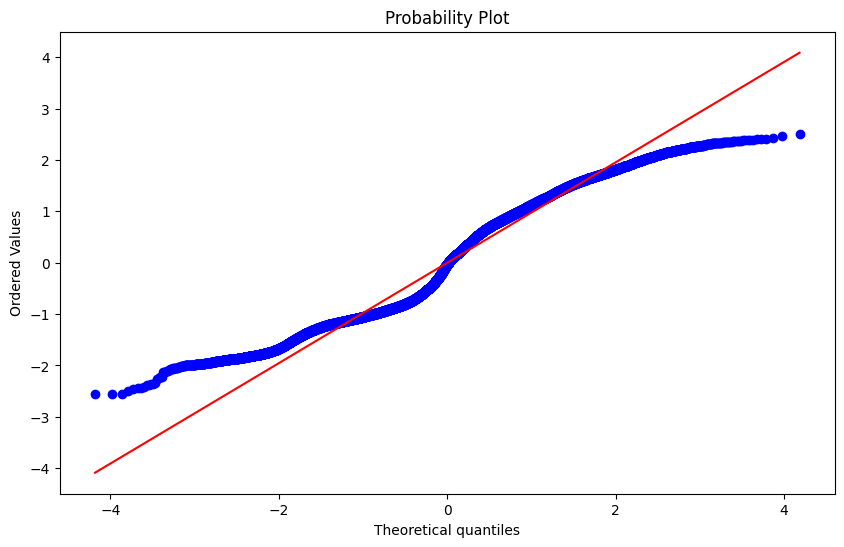

In [ ]:
st_residual = model.get_influence().resid_studentized_internal
plt.figure(figsize=(10,6))
stats.probplot(st_residual,dist='norm',plot=pylab)
plt.show()

Bi·ªÉu ƒë·ªì Q-Q cho ph·∫ßn d∆∞ gi√∫p ƒë√°nh gi√° gi·∫£ ƒë·ªãnh v·ªÅ t√≠nh chu·∫©n c·ªßa sai s·ªë. N·∫øu h·∫ßu h·∫øt c√°c ƒëi·ªÉm d·ªØ li·ªáu n·∫±m g·∫ßn v√† d·ªçc theo ƒë∆∞·ªùng ch√©o 45 ƒë·ªô, ƒëi·ªÅu ƒë√≥ cho th·∫•y ph·∫ßn d∆∞ c√≥ ph√¢n ph·ªëi g·∫ßn chu·∫©n. S·ª± l·ªách kh·ªèi ƒë∆∞·ªùng n√†y ·ªü hai ƒë·∫ßu ho·∫∑c ·ªü gi·ªØa cho th·∫•y ph√¢n ph·ªëi sai s·ªë c√≥ th·ªÉ kh√¥ng chu·∫©n

**Test of Linearity**

  Null Hypothesis      - the data is following the Guassian curve

  Alternate Hypothesis - the data is not following the Guassian curve

In [ ]:
from scipy.stats import shapiro
stat = shapiro(st_residual)
stat

ShapiroResult(statistic=np.float64(0.954883106348231), pvalue=np.float64(3.045295794549839e-77))

In [ ]:
if stat[1] > 0.05:
    print('The p value is',round(stat[1],4),' > 0.05. So Rejecting the Null')
else:
    print('The p value is',round(stat[1],4),' < 0.05. So Accepting the Null')

The p value is 0.0  < 0.05. So Accepting the Null


M·ª•c ƒë√≠ch c·ªßa "Test of Linearity" l√† ƒë·ªÉ x√°c ƒë·ªãnh xem m·ªëi quan h·ªá gi·ªØa bi·∫øn ph·ª• thu·ªôc (target variable) v√† c√°c bi·∫øn ƒë·ªôc l·∫≠p (predictor variables) c√≥ th·ª±c s·ª± l√† tuy·∫øn t√≠nh hay kh√¥ng.

**3) Multicollinearity**

C·∫ßn x√°c ƒë·ªãnh v√¨ Multicollinearity l√†m gi·∫£m ƒë·ªô tin c·∫≠y c·ªßa m√¥ h√¨nh h·ªìi quy tuy·∫øn t√≠nh.

H·ªá s·ªë l·∫°m ph√°t ph∆∞∆°ng sai :

Gi√° tr·ªã VIF = 1: Kh√¥ng c√≥ t∆∞∆°ng quan

Gi√° tr·ªã VIF < 5: Trung b√¨nh

Gi√° tr·ªã VIF > 5, < 10: Cao

Gi√° tr·ªã VIF > 10: R·∫•t cao n√™n lo·∫°i b·ªè bi·∫øn

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
for i in range(0,len(X.columns)):
    print(data.columns[i] ,'\t', variance_inflation_factor(X.values,i))

holiday 	 1.0008701999409622
temp 	 1.1292345297264272
rain_1h 	 1.0483414175731256
snow_1h 	 1.0029057594976027
Year 	 1.0874499710123653
Month 	 1.1020678943916942
Day 	 1.0025456066419607
Hour 	 1.018440303568671
weather_main 	 1.065901692749399
weather_description 	 1.0425453056747023


Kh√¥ng c√≥ m·ªëi t∆∞∆°ng quan gi·ªØa c√°c t√≠nh nƒÉng, t·∫•t c·∫£ c√°c gi√° tr·ªã VIF ƒë·ªÅu n·∫±m trong ph·∫°m vi 5, ƒëi·ªÅu n√†y cho th·∫•y kh√¥ng c√≥ hi·ªán t∆∞·ª£ng ƒëa c·ªông tuy·∫øn

**4. Autocorrelation (T·ª± t∆∞∆°ng quan sai s·ªë)**

T·ª± t∆∞∆°ng quan x·∫£y ra khi c√°c ph·∫ßn d∆∞ kh√¥ng ƒë·ªôc l·∫≠p v·ªõi nhau. Kh√¥ng n√™n c√≥ t·ª± t∆∞∆°ng quan v√¨ Sai s·ªë t·∫°i th·ªùi ƒëi·ªÉm n√†y kh√¥ng ƒë∆∞·ª£c ph·ª• thu·ªôc sai s·ªë t·∫°i th·ªùi ƒëi·ªÉm kh√°c.

In [ ]:
from  statsmodels.stats.stattools import durbin_watson
stat =durbin_watson(residuals)
stat
if stat != 2:
    print('The p value is',round(stat,4),' != 2. So Rejecting the Null')
else:
    print('The p value is',round(stat,4),' == 2. So Accepting the Null')

The p value is 0.2287  != 2. So Rejecting the Null


The p value is 0.2287  != 2. So Rejecting the Null

C√≥ m·ªëi t∆∞∆°ng quan t√≠ch c·ª±c trong ph·∫ßn d∆∞

# **4/Modeling Linear Regression**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [ ]:
data.head()

holiday    temp  rain_1h  snow_1h  Year  Month  Day  Hour  weather_main  \
0        7  288.28      0.0      0.0  2012     10    2     9             1   
1        7  289.36      0.0      0.0  2012     10    2    10             1   
2        7  289.58      0.0      0.0  2012     10    2    11             1   
3        7  290.13      0.0      0.0  2012     10    2    12             1   
4        7  291.14      0.0      0.0  2012     10    2    13             1   

   weather_description  traffic_volume  
0                   24            5545  
1                    2            4516  
2                   19            4767  
3                   19            5026  
4                    2            4918

In [ ]:
X = data.drop('traffic_volume',axis=1)
Y = data['traffic_volume']

X: t·∫•t c·∫£ c√°c ƒë·∫∑c tr∆∞ng ƒë·∫ßu v√†o (features) ngo·∫°i tr·ª´ traffic_volume

Y: c·ªôt traffic_volume ‚Äì l√† bi·∫øn m·ª•c ti√™u (target)

In [ ]:
#Train Test Split

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=0)

In [ ]:
# In s·ªë l∆∞·ª£ng m·∫´u trong t·∫≠p hu·∫•n luy·ªán
print(f"Training: {ytrain.shape[0]}")

# In s·ªë l∆∞·ª£ng m·∫´u trong t·∫≠p ki·ªÉm tra

print(f"Test: {ytest.shape[0]}")

Training: 38563
Test: 9641


In [ ]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(xtrain,ytrain)
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None)
pred = LR.predict(xtest)

**Evaluation Metrics**

In [ ]:
import sklearn.metrics as metrics
print('R Squared : ',metrics.r2_score(ytest,pred))
print('Mean Absolute Error : ',metrics.mean_absolute_error(ytest,pred))
print('Mean Squared Error : ',metrics.mean_squared_error(ytest,pred))
print('Root Mean Squared Error : ',np.sqrt(metrics.mean_squared_error(ytest,pred)))

R Squared :  0.1377462605480566
Mean Absolute Error :  1620.4223714266739
Mean Squared Error :  3372070.214663053
Root Mean Squared Error :  1836.319747392336


Khi ƒë∆∞a t·∫•t c·∫£ c√°c ƒë·∫∑c tr∆∞ng v√†o m√¥ h√¨nh, ch√∫ng ta ch·ªâ thu ƒë∆∞·ª£c gi√° tr·ªã R¬≤ l√† x·∫•p x·ªâ 0.14 (14%), t·ª©c l√† m√¥ h√¨nh ch·ªâ gi·∫£i th√≠ch ƒë∆∞·ª£c 14% s·ª± bi·∫øn thi√™n c·ªßa traffic_volume.
N√≥i c√°ch kh√°c, c√°c ƒë·∫∑c tr∆∞ng hi·ªán t·∫°i kh√¥ng gi√∫p d·ª± ƒëo√°n t·ªët, v√† 86% c√≤n l·∫°i l√† do y·∫øu t·ªë kh√°c ho·∫∑c nhi·ªÖu ch∆∞a ƒë∆∞·ª£c m√¥ h√¨nh n·∫Øm b·∫Øt.

**Creating a GRID search to find the best single feature**

Grid Search ƒë·ªÉ t√¨m feature t·ªët nh·∫•t l√† qu√° tr√¨nh:

üëâ Th·ª≠ t·ª´ng ƒë·∫∑c tr∆∞ng (feature) m·ªôt, hu·∫•n luy·ªán m√¥ h√¨nh tr√™n m·ªói ƒë·∫∑c tr∆∞ng, r·ªìi so s√°nh ƒë·ªô ch√≠nh x√°c (v√≠ d·ª• R¬≤).

‚Üí M·ª•c ƒë√≠ch: T√¨m feature ƒë∆°n l·∫ª d·ª± ƒëo√°n t·ªët nh·∫•t cho bi·∫øn m·ª•c ti√™u.

In [ ]:
for i in range(len(data.columns)-1):
    X=  data[[data.columns[i]]]
    Y=  data[['traffic_volume']]
    xtrain,xtest,ytrain,ytest = train_test_split(X,Y,test_size = 0.25,random_state = 0)
    LR.fit(xtrain,ytrain)
    pred = LR.predict(xtest)
    print(data.columns[i],': ',round(metrics.r2_score(ytest,pred),4))

holiday :  0.0006
temp :  0.0192
rain_1h :  -0.0
snow_1h :  -0.0001
Year :  -0.0002
Month :  0.0
Day :  -0.0001
Hour :  0.1278
weather_main :  0.0002
weather_description :  0.0041


T·ª´ ƒëi·ªÉm R¬≤ ·ªü tr√™n, ch·ªâ c√≥ 2 ƒë·∫∑c tr∆∞ng temp v√† Hour cho k·∫øt qu·∫£ d·ª± ƒëo√°n t·ªët h∆°n.

‚Üí V√¨ v·∫≠y, ta ch·ªçn 2 ƒë·∫∑c tr∆∞ng n√†y l√†m c∆° s·ªü, r·ªìi th√™m d·∫ßn c√°c ƒë·∫∑c tr∆∞ng kh√°c v√†o ƒë·ªÉ c·∫£i thi·ªán m√¥ h√¨nh.

In [ ]:
for i in range(len(data.columns)-1):
    X=  data[['temp','Hour',data.columns[i]]]
    Y=  data[['traffic_volume']]
    xtrain,xtest,ytrain,ytest = train_test_split(X,Y,test_size = 0.25,random_state = 0)
    LR.fit(xtrain,ytrain)
    pred = LR.predict(xtest)
    print(data.columns[i],round(metrics.r2_score(ytest,pred),4))

holiday 0.1378
temp 0.1376
rain_1h 0.1376
snow_1h 0.1375
Year 0.1376
Month 0.1385
Day 0.1376
Hour 0.1376
weather_main 0.1373
weather_description 0.1398


ƒê·∫∑c tr∆∞ng ti·∫øp theo c√≥ ƒëi·ªÉm R¬≤ cao nh·∫•t l√† weather_description, v√¨ v·∫≠y ta s·∫Ω th√™m ƒë·∫∑c tr∆∞ng n√†y v√†o m√¥ h√¨nh trong v√≤ng l·∫∑p ti·∫øp theo ƒë·ªÉ ki·ªÉm tra xem m√¥ h√¨nh c√≥ c·∫£i thi·ªán hay kh√¥ng.










In [ ]:
for i in range(len(data.columns)-1):
    X=  data[['temp','Hour','weather_description',data.columns[i]]]
    Y=  data[['traffic_volume']]
    xtrain,xtest,ytrain,ytest = train_test_split(X,Y,test_size = 0.25,random_state = 0)
    LR.fit(xtrain,ytrain)
    pred = LR.predict(xtest)
    print(data.columns[i],round(metrics.r2_score(ytest,pred),4))

holiday 0.14
temp 0.1398
rain_1h 0.1399
snow_1h 0.1397
Year 0.1395
Month 0.1408
Day 0.1398
Hour 0.1398
weather_main 0.1397
weather_description 0.1398


ƒê·∫∑c tr∆∞ng ti·∫øp theo c√≥ ƒëi·ªÉm R¬≤ cao nh·∫•t l√† holiday, v√¨ v·∫≠y ta s·∫Ω th√™m ƒë·∫∑c tr∆∞ng n√†y v√†o m√¥ h√¨nh trong v√≤ng l·∫∑p ti·∫øp theo ƒë·ªÉ ki·ªÉm tra m·ª©c c·∫£i thi·ªán c·ªßa m√¥ h√¨nh.

In [ ]:
for i in range(len(data.columns)-1):
    X=  data[['temp','Hour','weather_description','holiday',data.columns[i]]]
    Y=  data[['traffic_volume']]
    xtrain,xtest,ytrain,ytest = train_test_split(X,Y,test_size = 0.25,random_state = 0)
    LR.fit(xtrain,ytrain)
    pred = LR.predict(xtest)
    print(data.columns[i],round(metrics.r2_score(ytest,pred),4))

holiday 0.14
temp 0.14
rain_1h 0.1401
snow_1h 0.1399
Year 0.1397
Month 0.1409
Day 0.14
Hour 0.14
weather_main 0.1399
weather_description 0.14


Ch√∫ng ta ƒë√£ ƒë·∫°t ƒë∆∞·ª£c ƒëi·ªÉm s·ªë R¬≤ t∆∞∆°ng ƒë∆∞∆°ng v·ªõi m√¥ h√¨nh g·ªëc khi s·ª≠ d·ª•ng to√†n b·ªô ƒë·∫∑c tr∆∞ng.
T·ª´ ƒë√≥ c√≥ th·ªÉ k·∫øt lu·∫≠n r·∫±ng ch·ªâ c·∫ßn 4 ƒë·∫∑c tr∆∞ng ['temp', 'Hour', 'weather_description', 'holiday'] l√† ƒë·ªß ƒë·ªÉ d·ª± ƒëo√°n.

B·ªën ƒë·∫∑c tr∆∞ng n√†y ƒë√£ ƒë√≥ng g√≥p to√†n b·ªô cho 14% ƒë·ªô bi·∫øn thi√™n c·ªßa bi·∫øn ph·ª• thu·ªôc (traffic_volume) ‚Äì nghƒ©a l√† c√°c ƒë·∫∑c tr∆∞ng c√≤n l·∫°i h·∫ßu nh∆∞ kh√¥ng c·∫£i thi·ªán m√¥ h√¨nh.

**Prepresentation**

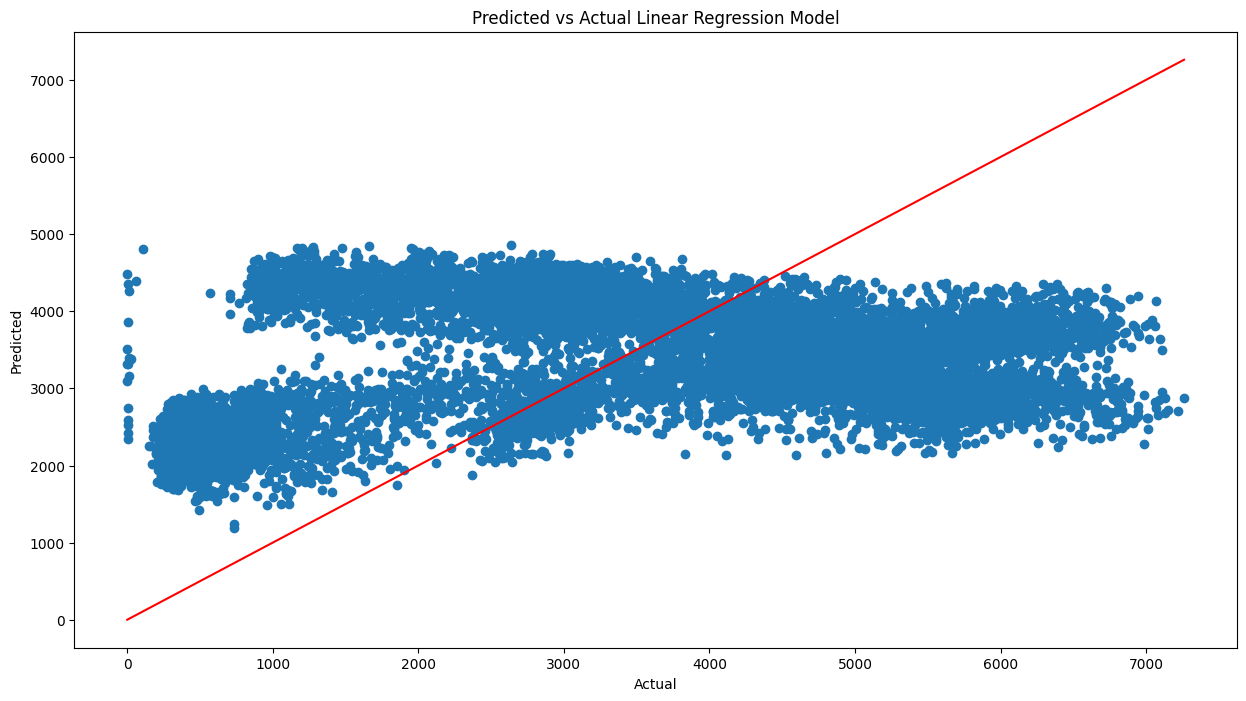

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,8))
plt.scatter(ytest, pred)
lims = [ytest.min(), ytest.max()]  # ho·∫∑c pred.max(), nh∆∞ng t·ªët h∆°n l√† so s√°nh c√πng chi·ªÅu
plt.plot(lims, lims, color='red')
plt.title('Predicted vs Actual Linear Regression Model')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

Ch√∫ng ta c√≥ th·ªÉ th·∫•y r·∫±ng ƒë∆∞·ªùng th·∫≥ng kh√¥ng th·ªÉ n·∫Øm b·∫Øt ƒë∆∞·ª£c c√°c m·∫´u trong d·ªØ li·ªáu

-> underfitting ‚Äî t·ª©c l√† m√¥ h√¨nh qu√° ƒë∆°n gi·∫£n, kh√¥ng n·∫Øm b·∫Øt ƒë∆∞·ª£c m·ªëi quan h·ªá ph·ª©c t·∫°p gi·ªØa c√°c bi·∫øn. ƒê∆∞·ªùng th·∫≥ng (Linear Regression) kh√¥ng th·ªÉ "b·∫Øt k·ªãp" xu h∆∞·ªõng cong trong d·ªØ li·ªáu.

ƒê·ªÉ kh·∫Øc ph·ª•c t√¨nh tr·∫°ng kh√¥ng kh·ªõp, ch√∫ng ta c·∫ßn tƒÉng ƒë·ªô ph·ª©c t·∫°p c·ªßa m√¥ h√¨nh

‚Üí C√°ch l√†m: bi·∫øn ƒë·ªïi ƒë·∫∑c tr∆∞ng b·∫±ng c√°ch th√™m c√°c b·∫≠c cao h∆°n (polynomial features), v√≠ d·ª• nh∆∞ temp¬≤, hour¬≤,... ƒë·ªÉ t·∫°o ra m√¥ h√¨nh h·ªìi quy ƒëa th·ª©c (Polynomial Regression).

In [ ]:
#(Polynomial Regression
from sklearn.preprocessing import PolynomialFeatures
pf = PolynomialFeatures(degree=2)
data1 = data.copy()
X = data1.drop('traffic_volume',axis=1)
Y= data1['traffic_volume']
#Transforming the data
X = pf.fit_transform(X)
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=0)
LR = LinearRegression()
LR.fit(xtrain,ytrain)
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None)
pred = LR.predict(xtest)
print('R Squared : ',metrics.r2_score(ytest,pred))
print('Mean Absolute Error : ',metrics.mean_absolute_error(ytest,pred))
print('Mean Squared Error : ',metrics.mean_squared_error(ytest,pred))
print('Root Mean Squared Error : ',np.sqrt(metrics.mean_squared_error(ytest,pred)))

R Squared :  0.656624290680182
Mean Absolute Error :  893.3409605672986
Mean Squared Error :  1340527.0850274765
Root Mean Squared Error :  1157.8113339518993


B√¢y gi·ªù ch√∫ng ta c√≥ th·ªÉ th·∫•y b√¨nh ph∆∞∆°ng R ƒë√£ tƒÉng l√™n v√† n√≥ l√† 65 ph·∫ßn trƒÉm cho th·∫•y 65 % bi·∫øn th·ªÉ b·ªã gi·∫£m sau khi chuy·ªÉn ƒë·ªïi d·ªØ li·ªáu th√†nh h·ªìi quy ƒëa th·ª©c

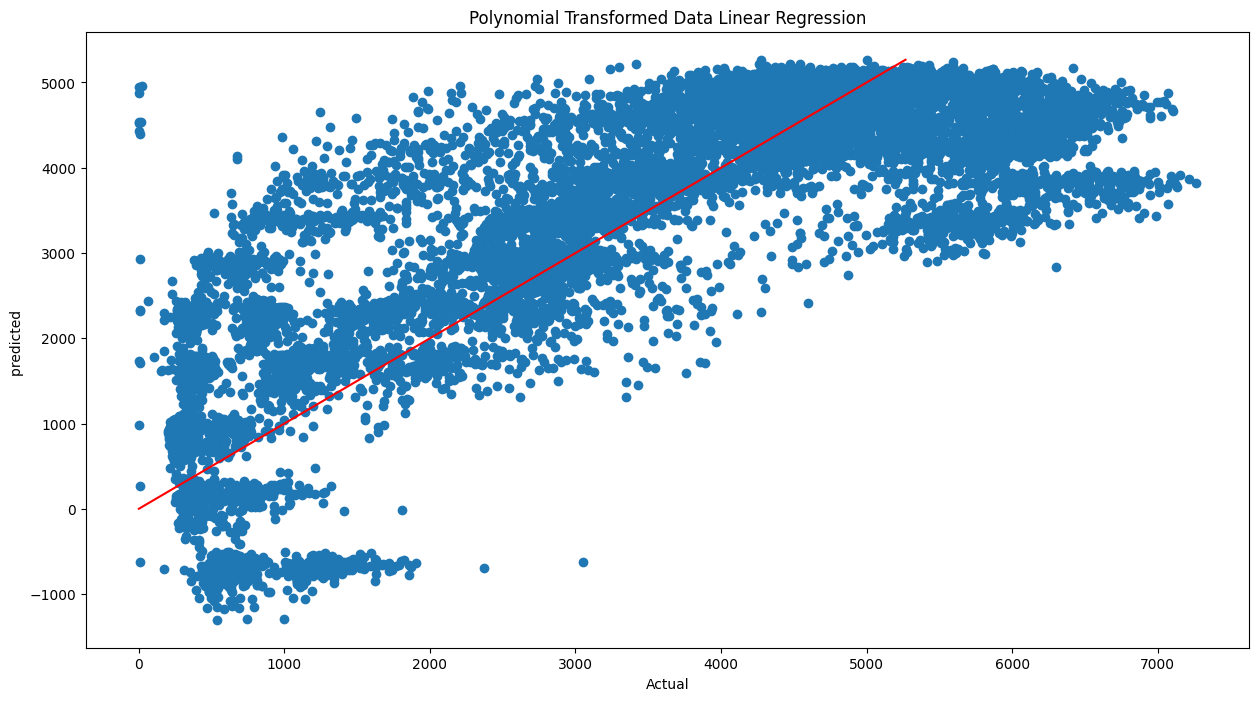

In [ ]:
plt.figure(figsize=(15,8))
plt.scatter (ytest, pred)
range = [ytest.min (), pred.max ()]
plt.plot (range, range, 'red')
plt.title('Polynomial Transformed Data Linear Regression')
plt.xlabel ('Actual')
plt.ylabel ('predicted ')
plt.show ()

ch√∫ng ta c√≥ th·ªÉ th·∫•y r·∫±ng ƒë∆∞·ªùng th·∫≥ng v·∫´n ch∆∞a ph√π h·ª£p nh·∫•t nh∆∞ng n√≥ t·ªët h∆°n d·ªØ li·ªáu g·ªëc. D·ªØ li·ªáu ƒë√£ chuy·ªÉn ƒë·ªïi mang l·∫°i hi·ªáu su·∫•t t·ªët h∆°n d·ªØ li·ªáu g·ªëc.

# **5/Modeling Random Forest Method**

In [ ]:
data.head()

holiday    temp  rain_1h  snow_1h  Year  Month  Day  Hour  weather_main  \
0        7  288.28      0.0      0.0  2012     10    2     9             1   
1        7  289.36      0.0      0.0  2012     10    2    10             1   
2        7  289.58      0.0      0.0  2012     10    2    11             1   
3        7  290.13      0.0      0.0  2012     10    2    12             1   
4        7  291.14      0.0      0.0  2012     10    2    13             1   

   weather_description  traffic_volume  
0                   24            5545  
1                    2            4516  
2                   19            4767  
3                   19            5026  
4                    2            4918

In [ ]:
X = data.drop('traffic_volume',axis=1)
Y = data['traffic_volume']
#Train Test Split
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=0)

In [ ]:
print(f"Training: {ytrain.shape[0]}")
print(f"Test: {ytest.shape[0]}")

Training: 38563
Test: 9641


In [ ]:
from sklearn.ensemble import RandomForestRegressor
RT = RandomForestRegressor()
RT.fit(xtrain,ytrain)
pred = RT.predict(xtest)
print('R Squared : ',metrics.r2_score(ytest,pred))
print('Mean Absolute Error : ',metrics.mean_absolute_error(ytest,pred))
print('Mean Squared Error : ',metrics.mean_squared_error(ytest,pred))
print('Root Mean Squared Error : ',np.sqrt(metrics.mean_squared_error(ytest,pred)))

R Squared :  0.8326445686223037
Mean Absolute Error :  521.5679441966602
Mean Squared Error :  654487.4664962452
Root Mean Squared Error :  809.0039965885492


R^2 =0.83: t·ª©c l√† 83% bi·∫øn thi√™n trong l∆∞u l∆∞·ª£ng xe c√≥ th·ªÉ ƒë∆∞·ª£c gi·∫£i th√≠ch b·ªüi m√¥ h√¨nh (c√°c feature ƒë√£ ch·ªçn).

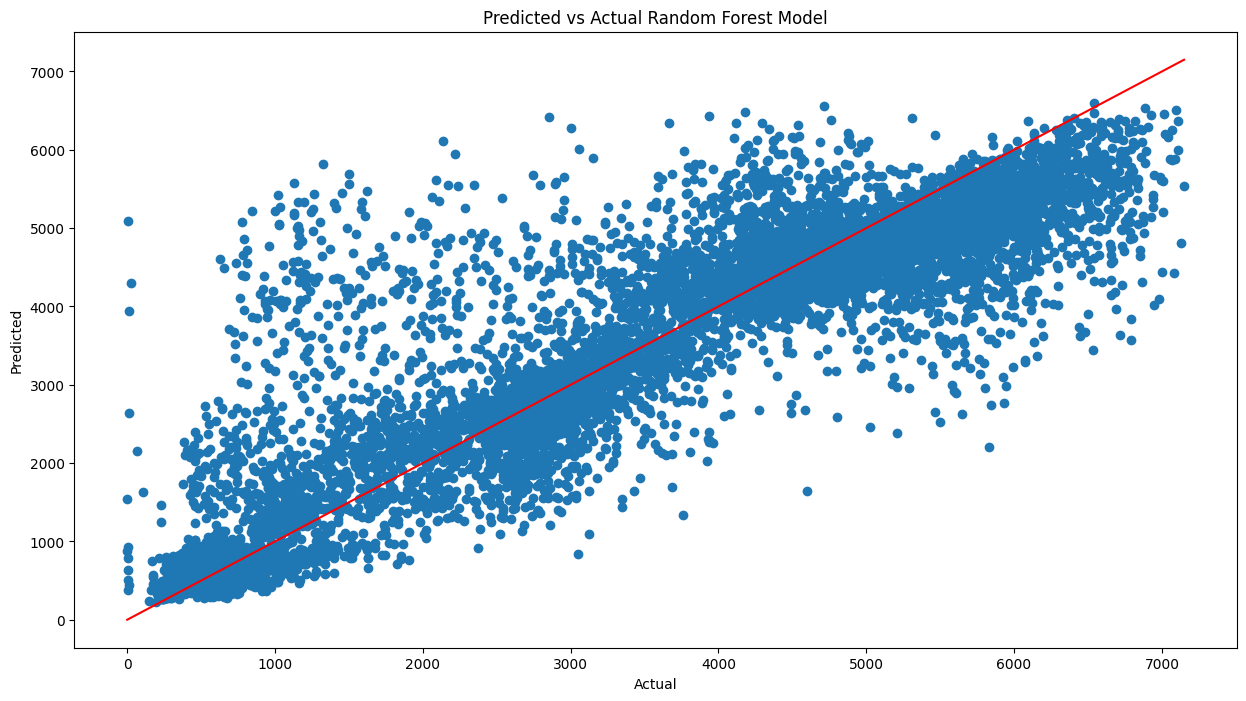

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,8))
plt.scatter(ytest, pred)
lims = [ytest.min(), ytest.max()]
plt.plot(lims, lims, color='red')
plt.title('Predicted vs Actual Random Forest Model')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

"Bi·ªÉu ƒë·ªì 'Predicted vs Actual' cho m√¥ h√¨nh Random Forest cho th·∫•y r·∫±ng c√°c ƒëi·ªÉm d·ªØ li·ªáu t·∫≠p trung r·∫•t ch·∫∑t ch·∫Ω xung quanh ƒë∆∞·ªùng ch√©o m√†u ƒë·ªè (y=x). ƒêi·ªÅu n√†y ch·ª©ng t·ªè m√¥ h√¨nh Random Forest c√≥ kh·∫£ nƒÉng d·ª± ƒëo√°n l∆∞u l∆∞·ª£ng giao th√¥ng v·ªõi ƒë·ªô ch√≠nh x√°c cao h∆°n nhi·ªÅu so v·ªõi m√¥ h√¨nh H·ªìi quy Tuy·∫øn t√≠nh ƒë∆°n gi·∫£n. M·ª©c ƒë·ªô t·∫≠p trung g·∫ßn ƒë∆∞·ªùng th·∫≥ng cho th·∫•y sai s·ªë d·ª± ƒëo√°n c·ªßa m√¥ h√¨nh Random Forest l√† t∆∞∆°ng ƒë·ªëi nh·ªè."

M√¥ h√¨nh Random Forest m√† kh√¥ng c√≥ b·∫•t k·ª≥ si√™u ƒë·ªìng h·ªì ƒëo n√†o cho 83 % ƒëi·ªÉm R b√¨nh ph∆∞∆°ng. H√£y th·ª≠ t√¨m HyperParameter t·ªët nh·∫•t cho m√¥ h√¨nh b·∫±ng c√°ch s·ª≠ d·ª•ng t√¨m ki·∫øm l∆∞·ªõi

**Grid Search for Hyper Parameter**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Kh·ªüi t·∫°o m√¥ h√¨nh Random Forest (ch∆∞a fit)
rf = RandomForestRegressor(random_state=0) # S·ª≠ d·ª•ng c√πng random_state n·∫øu c·∫ßn

# ƒê·ªãnh nghƒ©a kh√¥ng gian tham s·ªë
parameter_grid = {
    'max_depth': np.arange(1, 10),
    'n_estimators': np.arange(1, 15) # L∆∞u √Ω: n_estimators 1-15 l√† r·∫•t nh·ªè cho RF th·ª±c t·∫ø, n√™n tƒÉng l√™n (v√≠ d·ª• 50-200). Nh∆∞ng ƒë·ªÉ ch·∫°y nhanh cho v√≠ d·ª• th√¨ c√≥ th·ªÉ d√πng 1-15.
    #'min_samples_split': [2, 5, 10], # C√≥ th·ªÉ th√™m c√°c tham s·ªë kh√°c
    #'min_samples_leaf': [1, 2, 4]
}

# Kh·ªüi t·∫°o GridSearchCV
# cv=3 l√† h·ª£p l√Ω, nh∆∞ng c√≥ th·ªÉ tƒÉng l√™n 5 ho·∫∑c 10 n·∫øu d·ªØ li·ªáu ƒë·ªß l·ªõn
GS = GridSearchCV(estimator=rf, param_grid=parameter_grid, cv=3, scoring='r2', n_jobs=-1) # scoring='r2' ƒë·ªÉ t·ªëi ∆∞u R-squared, n_jobs=-1 ƒë·ªÉ d√πng t·∫•t c·∫£ core

# Th·ª±c hi·ªán Grid Search - CH·ªà TR√äN T·∫¨P HU·∫§N LUY·ªÜN
GS.fit(xtrain, ytrain)

# In ra b·ªô si√™u tham s·ªë t·ªët nh·∫•t
print("\nB·ªô si√™u tham s·ªë t·ªët nh·∫•t t√¨m ƒë∆∞·ª£c:")
print(GS.best_params_)

# ---------- ƒê√°nh gi√° m√¥ h√¨nh Random Forest cu·ªëi c√πng v·ªõi si√™u tham s·ªë t·ªët nh·∫•t ----------
print("\nƒê√°nh gi√° m√¥ h√¨nh Random Forest cu·ªëi c√πng v·ªõi si√™u tham s·ªë t·ªët nh·∫•t...")

# Kh·ªüi t·∫°o m√¥ h√¨nh Random Forest v·ªõi si√™u tham s·ªë t·ªët nh·∫•t
best_rf_model = RandomForestRegressor(**GS.best_params_, random_state=0)

# Hu·∫•n luy·ªán m√¥ h√¨nh cu·ªëi c√πng tr√™n TO√ÄN B·ªò t·∫≠p hu·∫•n luy·ªán
best_rf_model.fit(xtrain, ytrain)

# D·ª± ƒëo√°n tr√™n t·∫≠p ki·ªÉm tra
pred_tuned = best_rf_model.predict(xtest)

# ƒê√°nh gi√° hi·ªáu su·∫•t
r2_tuned = metrics.r2_score(ytest, pred_tuned)
mae_tuned = metrics.mean_absolute_error(ytest, pred_tuned)
mse_tuned = metrics.mean_squared_error(ytest, pred_tuned)
rmse_tuned = np.sqrt(mse_tuned)

print(f'\nR Squared (Tuned RF): {r2_tuned}')
print(f'Mean Absolute Error (Tuned RF): {mae_tuned}')
print(f'Mean Squared Error (Tuned RF): {mse_tuned}')
print(f'Root Mean Squared Error (Tuned RF): {rmse_tuned}')



B·ªô si√™u tham s·ªë t·ªët nh·∫•t t√¨m ƒë∆∞·ª£c:
{'max_depth': np.int64(9), 'n_estimators': np.int64(14)}

ƒê√°nh gi√° m√¥ h√¨nh Random Forest cu·ªëi c√πng v·ªõi si√™u tham s·ªë t·ªët nh·∫•t...

R Squared (Tuned RF): 0.7937172386241366
Mean Absolute Error (Tuned RF): 603.6439279252344
Mean Squared Error (Tuned RF): 806723.0370912917
Root Mean Squared Error (Tuned RF): 898.1776200124849


Nh√¨n chung RandomForest l√† m√¥ h√¨nh t·ªët h∆°n. T·∫•t c·∫£ c√°c ƒëi·ªÉm MAE, MSE, RMSE, R^2 ƒë·ªÅu t·ªët h∆°n khi so s√°nh v·ªõi c√°c m√¥ h√¨nh kh√°c. V√¨ n√≥ √≠t c√≥ kh·∫£ nƒÉng qu√° kh·ªõp khi so s√°nh v·ªõi c√°c m√¥ h√¨nh kh√°c n√™n c√≥ th·ªÉ ƒë∆∞·ª£c s·ª≠ d·ª•ng ƒë·ªÉ d·ª± ƒëo√°n.